In [2]:
import torch
from torch import nn
from d2l import torch as d2l

In [3]:
class LSTMScratch(d2l.Module):
    def __init__(self, num_inputs, num_hiddens, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()

        init_weight = lambda *shape: nn.Parameter(torch.randn(*shape) * sigma)
        triple = lambda: (init_weight(num_inputs, num_hiddens),
                          init_weight(num_hiddens, num_hiddens),
                          nn.Parameter(torch.zeros(num_hiddens)))
        self.W_xi, self.W_hi, self.b_i = triple()  # Input gate
        self.W_xf, self.W_hf, self.b_f = triple()  # Forget gate
        self.W_xo, self.W_ho, self.b_o = triple()  # Output gate
        self.W_xc, self.W_hc, self.b_c = triple()  # Input node

@d2l.add_to_class(LSTMScratch)
def forward(self, inputs, H_C=None):
    if H_C is None:
        # Initial state with shape: (batch_size, num_hiddens)
        H = torch.zeros((inputs.shape[1], self.num_hiddens),
                      device=inputs.device)
        C = torch.zeros((inputs.shape[1], self.num_hiddens),
                      device=inputs.device)
    else:
        H, C = H_C
    outputs = []
    for X in inputs:
        I = torch.sigmoid(torch.matmul(X, self.W_xi) +
                        torch.matmul(H, self.W_hi) + self.b_i)
        F = torch.sigmoid(torch.matmul(X, self.W_xf) +
                        torch.matmul(H, self.W_hf) + self.b_f)
        O = torch.sigmoid(torch.matmul(X, self.W_xo) +
                        torch.matmul(H, self.W_ho) + self.b_o)
        C_tilde = torch.tanh(torch.matmul(X, self.W_xc) +
                           torch.matmul(H, self.W_hc) + self.b_c)
        C = F * C + I * C_tilde
        H = O * torch.tanh(C)
        outputs.append(H)
    return outputs, (H, C)

#@d2l.add_to_class(d2l.RNNLMScratch)
#def loss(self, y1, y2):
#    print("onias")
#    l = 14
#    return l

In [17]:
@d2l.add_to_class(d2l.TimeMachine)
def _download(self):
    print("baixado de https://machado.mec.gov.br/obra-completa-lista/itemlist/category/23-romance")
    fname = "../data/quincas_borba.txt"
    with open(fname) as f:
        return f.read()

data = d2l.TimeMachine(batch_size=1024, num_steps=32)


baixado de https://machado.mec.gov.br/obra-completa-lista/itemlist/category/23-romance


In [18]:
print(data.vocab.idx_to_token)

[' ', '<unk>', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [41]:
#lstm = LSTMScratch(num_inputs=len(data.vocab), num_hiddens=32)
lstm = LSTMScratch(num_inputs=len(data.vocab), num_hiddens=50)
model = d2l.RNNLMScratch(lstm, vocab_size=len(data.vocab), lr=4)

trainer = d2l.Trainer(max_epochs=60, gradient_clip_val=1, num_gpus=1)

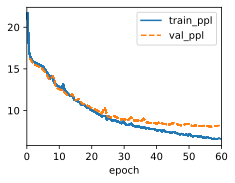

In [42]:
trainer.fit(model, data)

In [43]:
## original dataset: english text
model.predict('it has ', 100, data.vocab, d2l.try_gpu())
#'it has gound to the other three will so move traveller three dimension so it wime traveller so i think are '

'it has por de com se com se com se com se com se com se com se com se com se com se com se com se com se co'

In [44]:
## novo dataset: texto machado de assis
model.predict('ao vencedor', 70, data.vocab, d2l.try_gpu())

'ao vencedor o pricou o pricou o pricou o pricou o pricou o pricou o pricou o pric'